# How to interpolate a solution?

Let's imagine we have an **initial shell** represented by a **fine** mesh. We also have a **field** for which the values in each node are known.

For whatever reason, we want to represent the same field using a **coarser** mesh. How can we do it?

Let's first start by importing all the modules we need.

In [1]:
import numpy as np

from kokiy import CartShell
from kokiy.shell_utils import interpolate_solution_on_shell

Now, we create an initial shell represented by a **fine** mesh.

In [2]:
n_trans = 12
n_longi = 24
zero = np.array([0.00, 0.12, -0.2])
u_max = np.array([0.00, 0.12, 0.2])
v_max = np.array([0.20, 0.12, -0.2])

init_shell = CartShell(n_trans, n_longi, zero, u_max, v_max)

For demonstration purposes, let's use `np.random` to generate a **random field**.

In [3]:
np.random.seed(1)  # repeteability

data = np.random.random(init_shell.shape)

To create a **coarser** mesh we rely on `replicate` (we could have followed the same steps as above, but using less points).

In [4]:
n_trans = 6
n_longi = 12

new_shell = init_shell.replicate((n_trans, n_longi))

It is now time to perform the interpolation in the new mesh (notice we just have to adjust the variables accordingly to what `cloud2cloud` expects).

In [5]:
init_mesh = init_shell.xyz.reshape(-1, 3)

coarser_data = interpolate_solution_on_shell(new_shell, init_mesh, data.reshape(-1))

Let's take a look to what we've done using `pyvista`.

In [6]:
import pyvista as pv
from pyvista.utilities.fileio import from_meshio

pv.global_theme.background = 'white'
pv.global_theme.font.color = 'black'
pv.global_theme.cmap = 'coolwarm'
pv.set_jupyter_backend('static')

pv_init_mesh = from_meshio(init_shell.get_mesh('quad'))
pv_new_mesh = from_meshio(new_shell.get_mesh('quad'))

pl = pv.Plotter(notebook=True, shape=(1,2))

pl.subplot(0, 0)
pl.add_mesh(pv_init_mesh, show_edges=True,
            scalars=data.reshape(-1))
pl.view_xz()
pl.add_axes()
pl.camera.zoom(1.2)


pl.subplot(0, 1)
pl.add_mesh(pv_new_mesh, show_edges=True,
            scalars=coarser_data.reshape(-1))
pl.view_xz()
pl.camera.zoom(1.2)

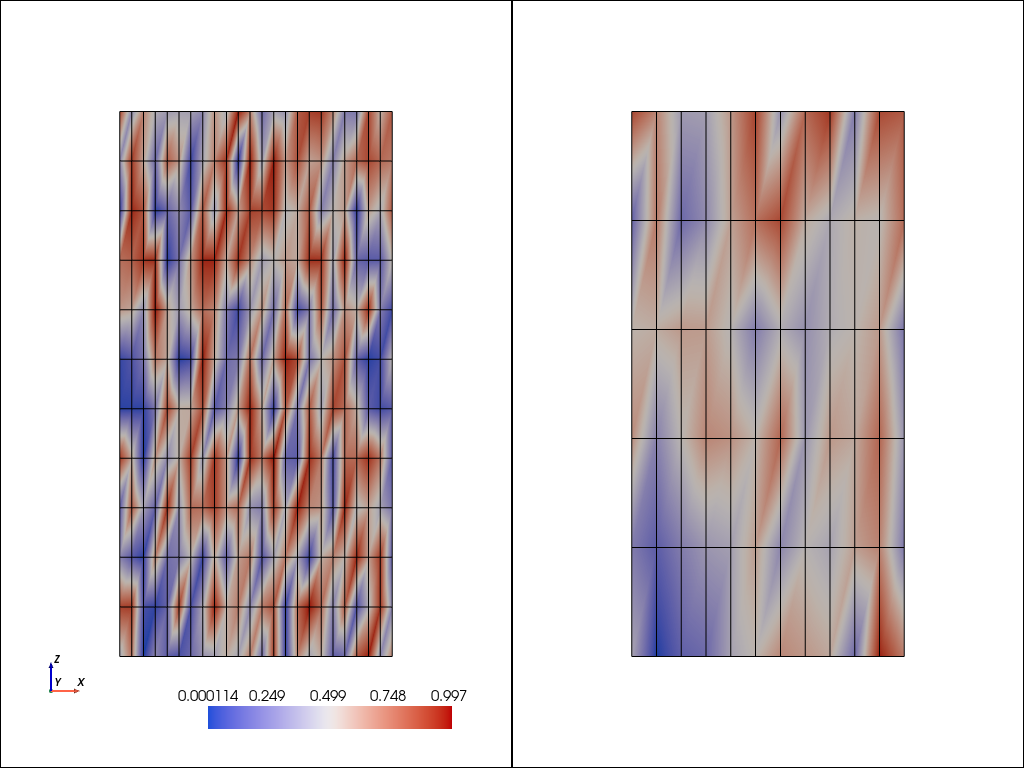

In [7]:
pl.show()

If you have several variables in a `dict` or in a [structured numpy array](https://numpy.org/doc/stable/user/basics.rec.html), use `interpolate_solutions_on_shell` instead (it will be faster than doing an external loop). Your `numpy` arrays may also contain time-dependent data (time must be the first variable).

## Where else can I apply this?

Imagine **instead of a structured fine mesh** you have an **unstructured mesh**. Well, the conversion process is very similar (instead of an initial shell, you will already have a mesh).